<a href="https://colab.research.google.com/github/SilahicAmil/End-To-End-Time-Series-Forcasting/blob/main/Time_Series_Forecasting_BitPredict.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Time series forecasting fundamentals with TensorFlow

Links:
* All Resources: https://github.com/mrdbourke/tensorflow-deep-learning
 

## Get Data

Hisotrical price data of Bitcoin from CoinDesk

In [1]:
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv

--2021-08-21 05:27:47--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 178509 (174K) [text/plain]
Saving to: ‘BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv’

BTC_USD_2013-10-01_ 100%[===================>] 174.33K  --.-KB/s    in 0.02s   

2021-08-21 05:27:47 (11.3 MB/s) - ‘BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv’ saved [178509/178509]



In [2]:
# Even though the datasets are smaller. Good to even get the small benefit of a GPU
!nvidia-smi -L


GPU 0: Tesla T4 (UUID: GPU-490f81ae-e053-9132-118b-c2a6d7a8cd5b)


## Importing time series data with Pandas

In [3]:
import pandas as pd
df= pd.read_csv("/content/BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv",
                parse_dates=["Date"],
                index_col=["Date"])
df.head()

,Currency,Closing Price (USD),24h Open (USD),24h High (USD),24h Low (USD)
Date,,,,,
2013-10-01,BTC,123.65499,124.30466,124.75166,122.56349
2013-10-02,BTC,125.45500,123.65499,125.75850,123.63383
2013-10-03,BTC,108.58483,125.45500,125.66566,83.32833
2013-10-04,BTC,118.67466,108.58483,118.67500,107.05816
2013-10-05,BTC,121.33866,118.67466,121.93633,118.00566


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2787 entries, 2013-10-01 to 2021-05-18
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Currency             2787 non-null   object 
 1   Closing Price (USD)  2787 non-null   float64
 2   24h Open (USD)       2787 non-null   float64
 3   24h High (USD)       2787 non-null   float64
 4   24h Low (USD)        2787 non-null   float64
dtypes: float64(4), object(1)
memory usage: 130.6+ KB


In [5]:
df["Closing Price (USD)"].dtype
# df["Date"].dtype()
# df["Currency"].dtype

dtype('float64')

In [6]:
len(df)

2787

Collecting the historical price of Bitcoin over the past ~8 years yielded 2787 samples.

Typically deep learning likes and yields better results with more data.

>Seasonality of a time series dataset refers to the number of samples per year. For the dataset here the seasonality value is 365. Meaning we collect one sample per day for 365 days of the year

In [7]:
df.head()

,Currency,Closing Price (USD),24h Open (USD),24h High (USD),24h Low (USD)
Date,,,,,
2013-10-01,BTC,123.65499,124.30466,124.75166,122.56349
2013-10-02,BTC,125.45500,123.65499,125.75850,123.63383
2013-10-03,BTC,108.58483,125.45500,125.66566,83.32833
2013-10-04,BTC,118.67466,108.58483,118.67500,107.05816
2013-10-05,BTC,121.33866,118.67466,121.93633,118.00566


In [8]:
# Only having date and closing price
bitcoin_prices = pd.DataFrame(df["Closing Price (USD)"]).rename(columns={"Closing Price (USD)": "Price"})
bitcoin_prices

,Price
Date,
2013-10-01,123.654990
2013-10-02,125.455000
2013-10-03,108.584830
2013-10-04,118.674660
2013-10-05,121.338660
...,...
2021-05-14,49764.132082
2021-05-15,50032.693137
2021-05-16,47885.625255


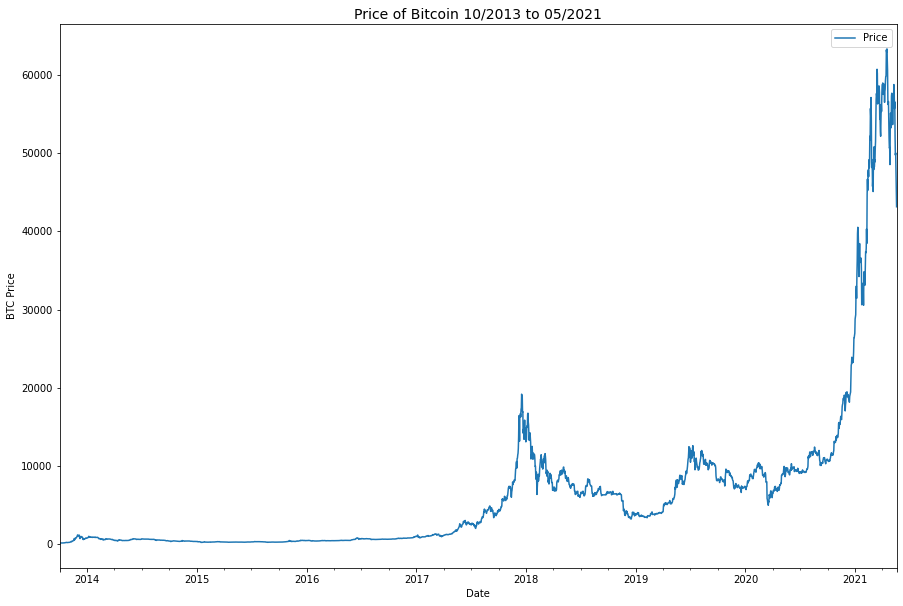

In [9]:
import matplotlib.pyplot as plt
bitcoin_prices.plot(figsize=(15,10))
plt.ylabel("BTC Price")
plt.title("Price of Bitcoin 10/2013 to 05/2021", fontsize=14);

## Importing time series data with Pythn's CSV Module

In [10]:
import csv
from datetime import datetime

timesteps = []
btc_price = []

with open("/content/BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv", "r") as f:
  csv_reader = csv.reader(f, delimiter=",")
  next(csv_reader) #Skips header
  for line in csv_reader:
    timesteps.append(datetime.strptime(line[1], "%Y-%m-%d")) # Gets dates as dates
    btc_price.append(float(line[2]))

# View first 10
timesteps[:10],btc_price[:10]

([datetime.datetime(2013, 10, 1, 0, 0),
  datetime.datetime(2013, 10, 2, 0, 0),
  datetime.datetime(2013, 10, 3, 0, 0),
  datetime.datetime(2013, 10, 4, 0, 0),
  datetime.datetime(2013, 10, 5, 0, 0),
  datetime.datetime(2013, 10, 6, 0, 0),
  datetime.datetime(2013, 10, 7, 0, 0),
  datetime.datetime(2013, 10, 8, 0, 0),
  datetime.datetime(2013, 10, 9, 0, 0),
  datetime.datetime(2013, 10, 10, 0, 0)],
 [123.65499,
  125.455,
  108.58483,
  118.67466,
  121.33866,
  120.65533,
  121.795,
  123.033,
  124.049,
  125.96116])

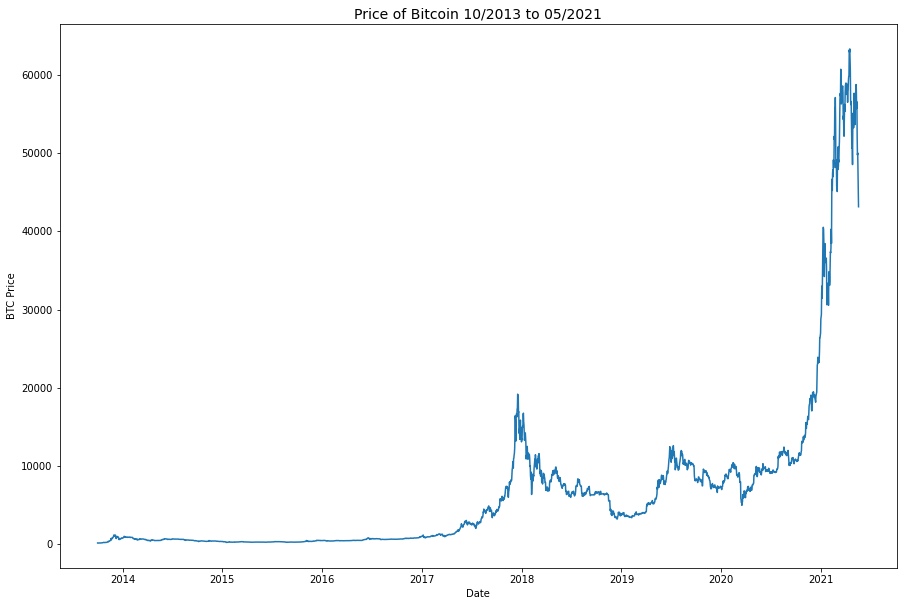

In [11]:
# plot from csv
import numpy as np
plt.figure(figsize=(15,10))
plt.plot(timesteps, btc_price)
plt.ylabel("BTC Price")
plt.xlabel("Date")
plt.title("Price of Bitcoin 10/2013 to 05/2021", fontsize=14);

## Create Train/Test Split 

In [12]:

# Get bitcoin date array
timesteps = bitcoin_prices.index.to_numpy()
prices = bitcoin_prices["Price"].to_numpy()

timesteps[:10], prices[:10]

(array(['2013-10-01T00:00:00.000000000', '2013-10-02T00:00:00.000000000',
        '2013-10-03T00:00:00.000000000', '2013-10-04T00:00:00.000000000',
        '2013-10-05T00:00:00.000000000', '2013-10-06T00:00:00.000000000',
        '2013-10-07T00:00:00.000000000', '2013-10-08T00:00:00.000000000',
        '2013-10-09T00:00:00.000000000', '2013-10-10T00:00:00.000000000'],
       dtype='datetime64[ns]'),
 array([123.65499, 125.455  , 108.58483, 118.67466, 121.33866, 120.65533,
        121.795  , 123.033  , 124.049  , 125.96116]))

In [13]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(timesteps,
                                                    prices,
                                                    test_size=0.2,
                                                    random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((2229,), (558,), (2229,), (558,))

In [14]:
# Create train and test splits for time series data
split_size = int(0.8 * len(prices)) 

# Train data splits
X_train, y_train = timesteps[:split_size], prices[:split_size]

# Test data splits
X_test, y_test = timesteps[split_size:], prices[split_size:]

len(X_train), len(X_test), len(y_train), len(y_test)

(2229, 558, 2229, 558)

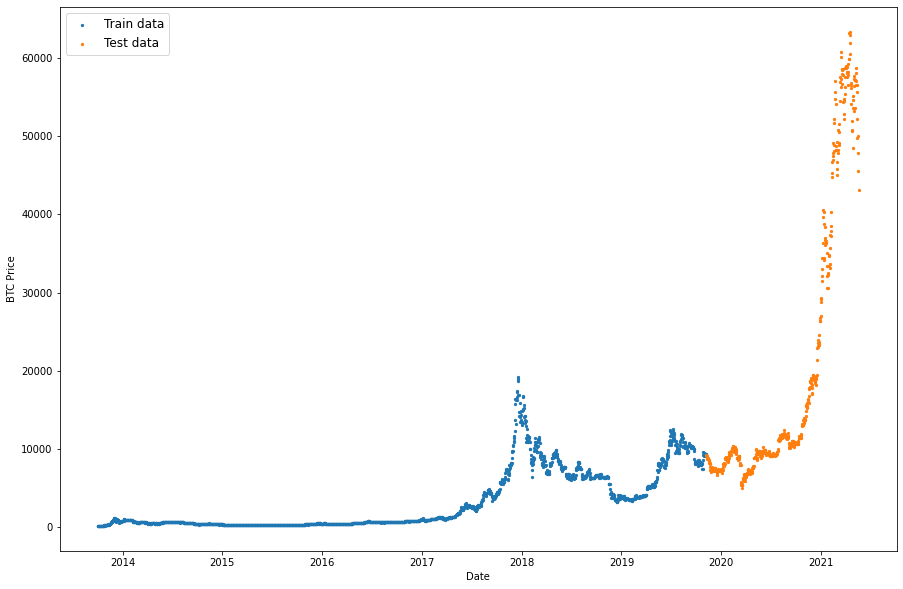

In [15]:
# Plot the splits
plt.figure(figsize=(15,10))
plt.scatter(X_train, y_train, s=5, label="Train data")
plt.scatter(X_test, y_test, s=5, label="Test data")
plt.xlabel("Date")
plt.ylabel("BTC Price")
plt.legend(fontsize=12)
plt.show();

## Create a plotting function


In [16]:
# Plotting function

def plot_time_series(timesteps, values, format=".", start=0, end=None, label=None):
  """
  Plots timesteps (series of points in times)

  Params
  -------
  timesteps: array of timestep values
  values: array of values across time
  foramt: style of plot defaults scatter
  start: where to start the plot
  end: where to end the plot
  label: label to show plot values
  """
  # Plot series

  plt.plot(timesteps[start:end], values[start:end], format, label=label)
  plt.xlabel("Time")
  plt.ylabel("BTC Price")
  if label:
    plt.legend(fontsize=14)
  plt.grid=(True)

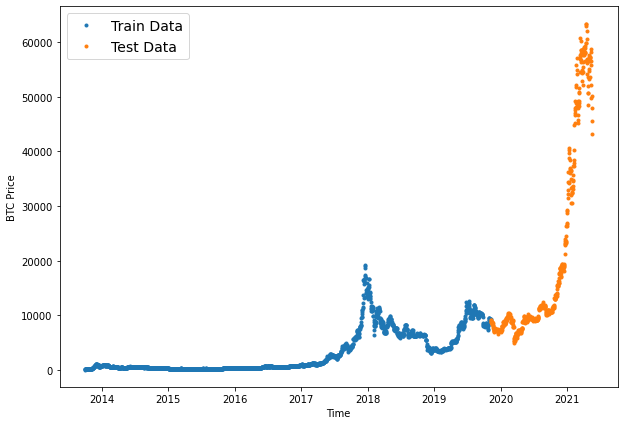

In [17]:
# Test out func
plt.figure(figsize=(10,7))
plot_time_series(timesteps=X_train, values=y_train, label="Train Data")
plot_time_series(timesteps=X_test, values=y_test, label="Test Data")

## Modelling Experiment

We've got sme BTC historical data for modelling. Time to run a series of modelling experiments to see which performs best

Common terms:
* Horizon = number of timesteps into the future were going to predict
* Window Size = number of timesteps we're going to use to predict horizon

Modeling experiments

Model Number	Model Type	Horizon size	Window size	Extra data
* 0	Naïve model (baseline)
* 1	Dense model	Horizon=1,	Window Size=7	
* 2	Same as Horizon=1, Window Size=30	
* 3	Same as Horizon=1, Window Size=30
* 4	Conv1D	Horizon=1, Window Size=7
* 5	LSTM	Horizon=1,	 Window Size=7	
* 6	Same as 1 (but with multivariate data)	Horizon=1,	Window Size=7	- Extra Data: Block Reward Size
* 7	N-BEATs Algorithm	Horizon=1,	Window Size=7	
* 8	Ensemble (multiple models optimized on different loss functions)	Horizon=1	Window Size=7	
* 9	Future prediction model (model to predict future values)	Horizon=1,	Window Size=7	
* 10	Same as 1 (but with turkey 🦃 data introduced) Horizon=1,	Window Size=7	

## Model 0: Baseline Forecast

In [18]:
# Create a naive forecast
naive_forecast = y_test[:-1]

naive_forecast[:10],naive_forecast[-10:]

(array([9226.48582088, 8794.35864452, 8798.04205463, 9081.18687849,
        8711.53433917, 8760.89271814, 8749.52059102, 8656.97092235,
        8500.64355816, 8469.2608989 ]),
 array([57107.12067189, 58788.20967893, 58102.19142623, 55715.54665129,
        56573.5554719 , 52147.82118698, 49764.1320816 , 50032.69313676,
        47885.62525472, 45604.61575361]))

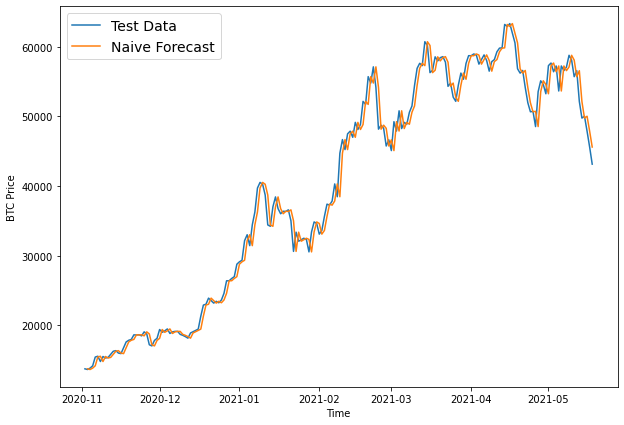

In [19]:
# Plot naive forecast
plt.figure(figsize=(10,7))
# plot_time_series(timesteps=X_train, values=y_train, label="Train Data")
plot_time_series(timesteps=X_test, values=y_test, start=360, format="-", label="Test Data")
plot_time_series(timesteps=X_test[1:], values=naive_forecast, start=360, format="-", label="Naive Forecast")

## Evaluating a time series model

Looking into some evaluation metrics for time series forecasting.

What are we doing?

We're predicting a number. So that means it is a regression problem.


Because we're working on a regression problem, we'll  regression metrics.

Regression Metrics:
* MAE - mean absolute error
* MSE - mean squared error
* RMSE - root mean square error
* MAPE/sMAPE - (symmetric) mean absolute percentage error
* MASE - mean absolute scaled error

For all of the above metrics, **lower is better**.

The main evaluation we are doing is: *how does our models forecast `(y_pred)` compare against the actual values `(y_true)`


In [20]:
import tensorflow as tf

In [21]:
def mean_absolute_scaled_error(y_true, y_pred):
  """
  Implement MASE (assumes no seasonality)
  """
  mae = tf.reduce_mean(tf.abs(y_true-y_pred))

  # Find MAE of naive forecast 
  mae_naive_no_season = tf.reduce_mean(tf.abs(y_true[1:]-y_true[:-1])) # Seasonality is 1 day. Reason for the shift of 1

  return mae / mae_naive_no_season

In [22]:
mean_absolute_scaled_error(y_true=y_test[1:], y_pred=naive_forecast).numpy()

0.9995699939182624

In [23]:
# Create a function to take in model preds and true values

def evaluate_preds(y_true,y_pred):
  # Make sure float32 for metric calculations
  y_true = tf.cast(y_true, dtype=tf.float32)
  y_pred = tf.cast(y_pred, dtype=tf.float32)

  # Calc evals
  mae = tf.keras.metrics.mean_absolute_error(y_true, y_pred)
  mse = tf.keras.metrics.mean_squared_error(y_true, y_pred)
  rmse = tf.sqrt(mse)
  mape = tf.keras.metrics.mean_absolute_percentage_error(y_true, y_pred)
  mase = mean_absolute_scaled_error(y_true, y_pred)

  return {"mae": mae.numpy(),
          "mse": mse.numpy(),
          "rmse": rmse.numpy(),
          "mape": mape.numpy(),
          "mase": mase.numpy()}

In [24]:
naive_results = evaluate_preds(y_true=y_test[1:],
                               y_pred=naive_forecast)
naive_results

{'mae': 567.9802,
 'mape': 2.516525,
 'mase': 0.99957,
 'mse': 1147547.0,
 'rmse': 1071.2362}

## Format Data Part 2: Windowing Dataset

We window our time series dataset to turn our data into a supervised learning problem

In [25]:
# Global variables
HORIZON = 1
WINDOW_SIZE = 7

In [26]:
# Create function to label windowed data

def get_labeled_window(x, horizon=HORIZON):
  """
  Creates labels for windowed dataset
  """
  return x[:, :-horizon], x[:,-horizon:]


In [27]:
# Test out function
test_window, test_label = get_labeled_window(tf.expand_dims(tf.range(8), axis=0))
print(f"Window: {tf.squeeze(test_window).numpy()} ->, Label: {tf.squeeze(test_label).numpy()}")

Window: [0 1 2 3 4 5 6] ->, Label: 7


In [28]:
# Create function to view numpy arrays as windows

def make_windows(x, window_size=WINDOW_SIZE, horizon=HORIZON):
  """
  Turns a 1D Array into a 2D of sequentially labeled windows of window_size and horizon size labels
  """
  # Create window of specific size (horizon on the end)
  window_step = np.expand_dims(np.arange(window_size+horizon), axis=0)

  # Numpy indexing - 2D Array of multiple window steps minus 1 (zero indexing)
  window_indexes = window_step + np.expand_dims(np.arange(len(x)-(window_size+horizon-1)), axis=0).T
  
  # print(f"Window indexes:\n {window_indexes, window_indexes.shape}")

  # Index on the target array with 2D array
  windowed_array = x[window_indexes]

  # Get the labelled windows
  windows, labels = get_labeled_window(windowed_array, horizon=horizon)
  
  return windows, labels
  

In [29]:
full_windows, full_labels = make_windows(prices, window_size=WINDOW_SIZE, horizon=HORIZON)
len(full_windows), len(full_labels)

(2780, 2780)

In [30]:
# View first 3 windows/labels

for i in range(3):
  print(f"Window: {full_windows[i]} -> Horizon: {full_labels[i]}")

Window: [123.65499 125.455   108.58483 118.67466 121.33866 120.65533 121.795  ] -> Horizon: [123.033]
Window: [125.455   108.58483 118.67466 121.33866 120.65533 121.795   123.033  ] -> Horizon: [124.049]
Window: [108.58483 118.67466 121.33866 120.65533 121.795   123.033   124.049  ] -> Horizon: [125.96116]


In [31]:
# View last 3 
for i in range(3):
  print(f"Window: {full_windows[i-3]} -> Horizon: {full_labels[i-3]}")

Window: [58788.20967893 58102.19142623 55715.54665129 56573.5554719
 52147.82118698 49764.1320816  50032.69313676] -> Horizon: [47885.62525472]
Window: [58102.19142623 55715.54665129 56573.5554719  52147.82118698
 49764.1320816  50032.69313676 47885.62525472] -> Horizon: [45604.61575361]
Window: [55715.54665129 56573.5554719  52147.82118698 49764.1320816
 50032.69313676 47885.62525472 45604.61575361] -> Horizon: [43144.47129086]


## Turning windows into train and test sets

In [32]:
# Train and test splits

def make_train_test_splits(windows, labels, test_split=0.2):
  """
  Splits matching pairs of windows and horizon (labels) into train and test splits
  """
  split_size = int(len(windows) * (1-test_split)) # Default to 80% train. 20% Test
  train_windows = windows[:split_size]
  train_labels = labels[:split_size]
  test_windows = windows[split_size:]
  test_labels = labels[split_size:]
  
  return train_windows, test_windows, train_labels, test_labels

In [33]:
# Create train and test windows
train_windows, test_windows, train_labels, test_labels = make_train_test_splits(full_windows, full_labels)
len(train_windows), len(test_windows), len(train_labels), len(test_labels)

(2224, 556, 2224, 556)

In [34]:
train_windows[:5]

array([[123.65499, 125.455  , 108.58483, 118.67466, 121.33866, 120.65533,
        121.795  ],
       [125.455  , 108.58483, 118.67466, 121.33866, 120.65533, 121.795  ,
        123.033  ],
       [108.58483, 118.67466, 121.33866, 120.65533, 121.795  , 123.033  ,
        124.049  ],
       [118.67466, 121.33866, 120.65533, 121.795  , 123.033  , 124.049  ,
        125.96116],
       [121.33866, 120.65533, 121.795  , 123.033  , 124.049  , 125.96116,
        125.27966]])

In [35]:
len(full_windows) * 0.8

2224.0

In [36]:
# Check if train labels are same
np.array_equal(np.squeeze(train_labels[:-HORIZON-1]), y_train[WINDOW_SIZE:])

True

## Creating a modelling checkpoint

In [37]:
import os

# Create function to implement ModelCheckpoint callback for specific filenames

def create_model_checkpoint(model_name, save_path="model_experiments"):
  return tf.keras.callbacks.ModelCheckpoint(filepath=os.path.join(save_path, model_name), # Monitors val_loss
                                            verbose=0,
                                            save_best_only=True)


## Model 1: Dense Model (Window=7, Horizon=1)

First simple dense model:

* Single Dense layer (128 hidden units)
* Output layer with linear activation aka no activation
* Adam optimization and MAE loss function
* Batch size of 128
* 100 Epochs - Dataset is smaller than normal, won't affect the learning time as much if the dataset was bigger



In [38]:
import tensorflow as tf
from tensorflow.keras import layers

# Random seed
tf.random.set_seed(42)

# Construct model

model_1 = tf.keras.Sequential([
    layers.Dense(128, activation="relu"),
    layers.Dense(HORIZON, activation="linear")
], name="model_1_dense")

# Compile
model_1.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["mae", "mse"])

# Fit the model

model_1.fit(x=train_windows,
            y=train_labels,
            epochs=100,
            verbose=1,
            batch_size=128,
            validation_data=(test_windows, test_labels),
            callbacks=[create_model_checkpoint(model_name=model_1.name)])



Epoch 1/100
18/18 [==============================] - 3s 10ms/step - loss: 780.3455 - mae: 780.3455 - mse: 2312725.7500 - val_loss: 2279.6528 - val_mae: 2279.6528 - val_mse: 12772731.0000
INFO:tensorflow:Assets written to: model_experiments/model_1_dense/assets
Epoch 2/100
18/18 [==============================] - 0s 3ms/step - loss: 247.6756 - mae: 247.6756 - mse: 285481.1875 - val_loss: 1005.9993 - val_mae: 1005.9993 - val_mse: 3441833.2500
INFO:tensorflow:Assets written to: model_experiments/model_1_dense/assets
Epoch 3/100
18/18 [==============================] - 0s 4ms/step - loss: 188.4116 - mae: 188.4116 - mse: 171891.6094 - val_loss: 923.2862 - val_mae: 923.2861 - val_mse: 2868220.7500
INFO:tensorflow:Assets written to: model_experiments/model_1_dense/assets
Epoch 4/100
18/18 [==============================] - 0s 3ms/step - loss: 169.4340 - mae: 169.4340 - mse: 151700.5781 - val_loss: 900.5872 - val_mae: 900.5872 - val_mse: 2683715.5000
INFO:tensorflow:Assets written to: model_ex

In [39]:
naive_results

{'mae': 567.9802,
 'mape': 2.516525,
 'mase': 0.99957,
 'mse': 1147547.0,
 'rmse': 1071.2362}

In [40]:
# Eval model on test data
# Model that was just tested. Not the best performing 
model_1.evaluate(test_windows, test_labels)


18/18 [==============================] - 0s 2ms/step - loss: 585.9758 - mae: 585.9758 - mse: 1197802.1250


[585.9757690429688, 585.9757690429688, 1197802.125]

In [41]:
# Load in saved best performing model_1

model_1 = tf.keras.models.load_model("model_experiments/model_1_dense/")
model_1.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 2ms/step - loss: 568.9510 - mae: 568.9510 - mse: 1171743.6250


[568.9510498046875, 568.9510498046875, 1171743.625]

## Making forecast (predictions on the pseudo future) with the model (test data)

To make forecasts lets write a function:

1. Take in a train model
2. Takes in some input data
3. Passes the input data to the models `predict()` method
4. Returns predictions

In [42]:
def make_preds(model, input_data):
  """
  Uses model to make preds on input data (time series)
  """
  
  # Pseudo future forecast
  forecast = model.predict(input_data)
  return tf.squeeze(forecast)

In [43]:
# Make preds with model_1

model_1_preds = make_preds(model_1, test_windows)
model_1_preds[:5]

<tf.Tensor: shape=(5,), dtype=float32, numpy=array([8861.71 , 8769.887, 9015.711, 8795.519, 8723.811], dtype=float32)>

In [44]:
# Evaluate preds

model_1_results = evaluate_preds(y_true=tf.squeeze(test_labels),
                                 y_pred=model_1_preds)

model_1_results

{'mae': 568.9511,
 'mape': 2.5448983,
 'mase': 0.99948955,
 'mse': 1171743.8,
 'rmse': 1082.4712}

In [45]:
naive_results

{'mae': 567.9802,
 'mape': 2.516525,
 'mase': 0.99957,
 'mse': 1147547.0,
 'rmse': 1071.2362}

In [46]:
test_windows.shape

(556, 7)

In [47]:
test_windows

array([[ 9290.89660239,  9202.41545055,  9369.62808116, ...,
         9335.75240233,  9226.48582088,  8794.35864452],
       [ 9202.41545055,  9369.62808116,  9326.59962378, ...,
         9226.48582088,  8794.35864452,  8798.04205463],
       [ 9369.62808116,  9326.59962378,  9335.75240233, ...,
         8794.35864452,  8798.04205463,  9081.18687849],
       ...,
       [58788.20967893, 58102.19142623, 55715.54665129, ...,
        52147.82118698, 49764.1320816 , 50032.69313676],
       [58102.19142623, 55715.54665129, 56573.5554719 , ...,
        49764.1320816 , 50032.69313676, 47885.62525472],
       [55715.54665129, 56573.5554719 , 52147.82118698, ...,
        50032.69313676, 47885.62525472, 45604.61575361]])

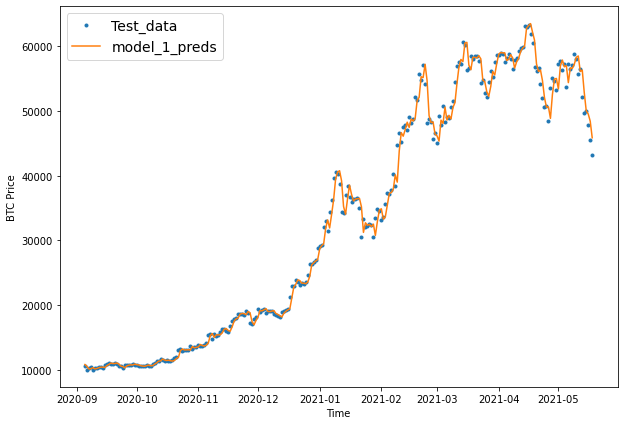

In [48]:
offset = 300
plt.figure(figsize=(10, 7))

# Account for test_window offset and index into test_labels
plot_time_series(timesteps=X_test[-len(test_windows):], values=test_labels[:, 0], start=offset, label="Test_data")
plot_time_series(timesteps=X_test[-len(test_windows):], values=model_1_preds, start=offset, format="-", label="model_1_preds")

## Model 2: Dense Model(Window=30, Horizon=1)

In [49]:
HORIZON = 1
WINDOW_SIZE = 30

In [50]:
# Make windowed data with horizon and window sizes

full_windows, full_labels = make_windows(prices, window_size=WINDOW_SIZE, horizon=HORIZON)

len(full_windows), len(full_labels)

(2757, 2757)

In [51]:
# Make train and test windows

train_windows, test_windows, train_labels, test_labels = make_train_test_splits(windows=full_windows,
                                                                                labels=full_labels,
                                                                                test_split=0.2)

len(train_windows), len(test_windows), len(train_labels), len(test_labels)

(2205, 552, 2205, 552)

In [52]:
train_windows[:5], train_labels[:5]

(array([[123.65499, 125.455  , 108.58483, 118.67466, 121.33866, 120.65533,
         121.795  , 123.033  , 124.049  , 125.96116, 125.27966, 125.9275 ,
         126.38333, 135.24199, 133.20333, 142.76333, 137.92333, 142.95166,
         152.55183, 160.33883, 164.31499, 177.63333, 188.29716, 200.70166,
         180.355  , 175.03166, 177.6965 , 187.15983, 192.75666, 197.4    ],
        [125.455  , 108.58483, 118.67466, 121.33866, 120.65533, 121.795  ,
         123.033  , 124.049  , 125.96116, 125.27966, 125.9275 , 126.38333,
         135.24199, 133.20333, 142.76333, 137.92333, 142.95166, 152.55183,
         160.33883, 164.31499, 177.63333, 188.29716, 200.70166, 180.355  ,
         175.03166, 177.6965 , 187.15983, 192.75666, 197.4    , 196.02499],
        [108.58483, 118.67466, 121.33866, 120.65533, 121.795  , 123.033  ,
         124.049  , 125.96116, 125.27966, 125.9275 , 126.38333, 135.24199,
         133.20333, 142.76333, 137.92333, 142.95166, 152.55183, 160.33883,
         164.31499, 177

In [53]:
tf.random.set_seed(42)

# Create model
model_2 = tf.keras.Sequential([
  layers.Dense(128, activation="relu"),
  layers.Dense(HORIZON)                                                        
                              
], name="model_2_dense")

# Compile
model_2.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam(),)

# Fit model

model_2.fit(train_windows,
            train_labels,
            epochs=100,
            batch_size=128,
            verbose=0,
            validation_data=(test_windows, test_labels),
            callbacks=[create_model_checkpoint(model_name=model_2.name)])

INFO:tensorflow:Assets written to: model_experiments/model_2_dense/assets
INFO:tensorflow:Assets written to: model_experiments/model_2_dense/assets
INFO:tensorflow:Assets written to: model_experiments/model_2_dense/assets
INFO:tensorflow:Assets written to: model_experiments/model_2_dense/assets
INFO:tensorflow:Assets written to: model_experiments/model_2_dense/assets
INFO:tensorflow:Assets written to: model_experiments/model_2_dense/assets
INFO:tensorflow:Assets written to: model_experiments/model_2_dense/assets
INFO:tensorflow:Assets written to: model_experiments/model_2_dense/assets
INFO:tensorflow:Assets written to: model_experiments/model_2_dense/assets
INFO:tensorflow:Assets written to: model_experiments/model_2_dense/assets
INFO:tensorflow:Assets written to: model_experiments/model_2_dense/assets
INFO:tensorflow:Assets written to: model_experiments/model_2_dense/assets
INFO:tensorflow:Assets written to: model_experiments/model_2_dense/assets
INFO:tensorflow:Assets written to: mod

In [54]:
# Evaluate model 2
model_2.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 1ms/step - loss: 659.3332


659.3331909179688

In [55]:
# Load in best model
model_2 = tf.keras.models.load_model("model_experiments/model_2_dense/")
model_2.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 1ms/step - loss: 605.8741


605.8740844726562

In [56]:
# Forecast preds
model_2_pred = make_preds(model_2,
                          input_data=test_windows)

In [57]:
# Eval results for preds
model_2_results = evaluate_preds(y_true=tf.squeeze(test_labels),
                                 y_pred=model_2_pred)
model_2_results

{'mae': 605.8741,
 'mape': 2.726445,
 'mase': 1.0590738,
 'mse': 1273360.8,
 'rmse': 1128.4329}

In [58]:
model_1_results

{'mae': 568.9511,
 'mape': 2.5448983,
 'mase': 0.99948955,
 'mse': 1171743.8,
 'rmse': 1082.4712}

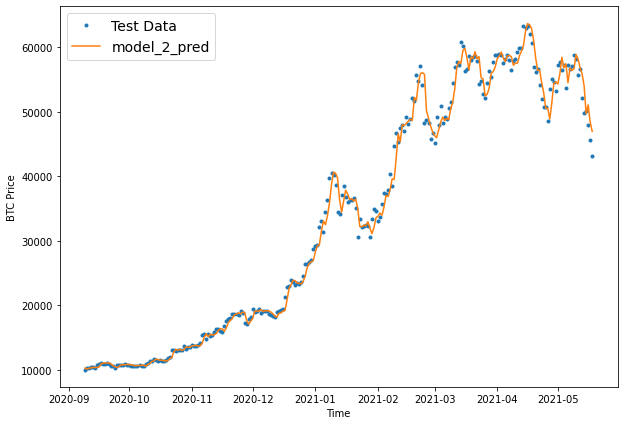

In [59]:
#PLot model
offset=300
plt.figure(figsize=(10,7))

plot_time_series(timesteps=X_test[-len(test_windows):], values=test_labels[:, 0], start=offset, label="Test Data")
plot_time_series(timesteps=X_test[-len(test_windows):], values=model_2_pred, start=offset, format="-", label="model_2_pred")

## Model 3: Dense Model (Window=30, Horizon=7)

In [60]:
HORIZON = 7
WINDOW_SIZE = 30

full_windows, full_labels = make_windows(prices, window_size=WINDOW_SIZE, horizon=HORIZON)

len(full_windows), len(full_labels)

(2751, 2751)

In [61]:
train_windows, test_windows, train_labels, test_labels = make_train_test_splits(windows=full_windows,
                                                                                labels=full_labels,
                                                                                test_split=0.2)

len(train_windows), len(test_windows), len(train_labels), len(test_labels)

(2200, 551, 2200, 551)

In [62]:
tf.random.set_seed(42)

# Create model

model_3 = tf.keras.Sequential([
    layers.Dense(128, activation="relu"),
    layers.Dense(HORIZON)
], name="model_3_dense")


# Compile

model_3.compile(loss="mae",
                 optimizer="adam")

# Fit model

model_3.fit(train_windows,
            train_labels,
            batch_size=128,
            epochs=100,
            verbose=0,
            validation_data=(test_windows, test_labels),
            callbacks=create_model_checkpoint(model_name=model_3.name))

INFO:tensorflow:Assets written to: model_experiments/model_3_dense/assets
INFO:tensorflow:Assets written to: model_experiments/model_3_dense/assets
INFO:tensorflow:Assets written to: model_experiments/model_3_dense/assets
INFO:tensorflow:Assets written to: model_experiments/model_3_dense/assets
INFO:tensorflow:Assets written to: model_experiments/model_3_dense/assets
INFO:tensorflow:Assets written to: model_experiments/model_3_dense/assets
INFO:tensorflow:Assets written to: model_experiments/model_3_dense/assets
INFO:tensorflow:Assets written to: model_experiments/model_3_dense/assets
INFO:tensorflow:Assets written to: model_experiments/model_3_dense/assets
INFO:tensorflow:Assets written to: model_experiments/model_3_dense/assets
INFO:tensorflow:Assets written to: model_experiments/model_3_dense/assets
INFO:tensorflow:Assets written to: model_experiments/model_3_dense/assets
INFO:tensorflow:Assets written to: model_experiments/model_3_dense/assets
INFO:tensorflow:Assets written to: mod

In [63]:
#  Evaluate

model_3.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 1ms/step - loss: 1300.1522


1300.1522216796875

In [64]:
# Load best model_3

model_3 = tf.keras.models.load_model("model_experiments/model_3_dense/")
model_3.evaluate(test_windows, test_labels)


18/18 [==============================] - 0s 2ms/step - loss: 1237.5063


1237.50634765625

In [65]:
# Make preds on model_3

model_3_preds = make_preds(model_3,
                           input_data=test_windows)

model_3_preds[:5]

<tf.Tensor: shape=(5, 7), dtype=float32, numpy=
array([[9004.694 , 9048.1   , 9425.09  , 9258.256 , 9495.797 , 9558.453 ,
        9357.3545],
       [8735.506 , 8840.303 , 9247.793 , 8885.601 , 9097.186 , 9174.327 ,
        9156.818 ],
       [8672.508 , 8782.387 , 9123.857 , 8770.371 , 9007.13  , 9003.869 ,
        9042.725 ],
       [8874.399 , 8784.74  , 9043.902 , 8943.052 , 9033.477 , 9176.489 ,
        9039.677 ],
       [8825.89  , 8777.44  , 8926.78  , 8870.179 , 9213.232 , 9268.156 ,
        8942.487 ]], dtype=float32)>

In [66]:
# Eval model_3 results

model_3_results = evaluate_preds(y_true=tf.squeeze(test_labels),
                                 y_pred=model_3_preds)

model_3_results

{'mae': array([ 513.6056  ,  355.08328 ,  327.17075 ,  358.5106  ,  420.53293 ,
         537.854   ,  545.6617  ,  485.9228  ,  584.49713 ,  687.38214 ,
         836.2264  ,  755.1576  ,  731.4957  ,  775.3399  ,  567.95544 ,
         266.80865 ,  188.80217 ,  188.10805 ,  253.095   ,  301.43256 ,
         151.10721 ,  196.8148  ,  191.46178 ,  231.65031 ,  143.61125 ,
         122.59089 ,  132.78871 ,  190.81174 ,  179.15994 ,  228.26004 ,
         314.44022 ,  379.09235 ,  278.32526 ,  295.34702 ,  299.3852  ,
         248.64983 ,  299.75668 ,  259.69434 ,  180.30531 ,  206.72922 ,
         374.62863 ,  144.85086 ,  142.33635 ,  131.11613 ,   93.9412  ,
          54.825542,   73.79555 ,  103.60121 ,  121.333916,  168.67278 ,
         183.90945 ,  152.25307 ,  186.57199 ,  146.91273 ,  240.42912 ,
         351.00656 ,  540.952   ,  549.1573  ,  521.2411  ,  526.8554  ,
         453.36237 ,  257.9811  ,  277.2947  ,  301.8247  ,  455.718   ,
         458.9603  ,  503.4438  ,  522.3119 

## Updating the evaluation function to work for larger horizons

In [67]:
# Create a function to take in model preds and true values

def evaluate_preds(y_true,y_pred):
  # Make sure float32 for metric calculations
  y_true = tf.cast(y_true, dtype=tf.float32)
  y_pred = tf.cast(y_pred, dtype=tf.float32)

  # Calc evals
  mae = tf.keras.metrics.mean_absolute_error(y_true, y_pred)
  mse = tf.keras.metrics.mean_squared_error(y_true, y_pred)
  rmse = tf.sqrt(mse)
  mape = tf.keras.metrics.mean_absolute_percentage_error(y_true, y_pred)
  mase = mean_absolute_scaled_error(y_true, y_pred)

  # Account for different sized metrics (longer horizons)

  if mae.ndim > 0:
    mae = tf.reduce_mean(mae)
    mse = tf.reduce_mean(mse)
    rmse = tf.reduce_mean(rmse)
    mape = tf.reduce_mean(mape)
    mase = tf.reduce_mean(mase)


  return {"mae": mae.numpy(),
          "mse": mse.numpy(),
          "rmse": rmse.numpy(),
          "mape": mape.numpy(),
          "mase": mase.numpy()}

In [68]:
# Model_3 results

model_3_results = evaluate_preds(y_true=tf.squeeze(test_labels),
                                 y_pred=model_3_preds)
model_3_results

{'mae': 1237.5063,
 'mape': 5.5588784,
 'mase': 2.2020733,
 'mse': 5405198.5,
 'rmse': 1425.7478}

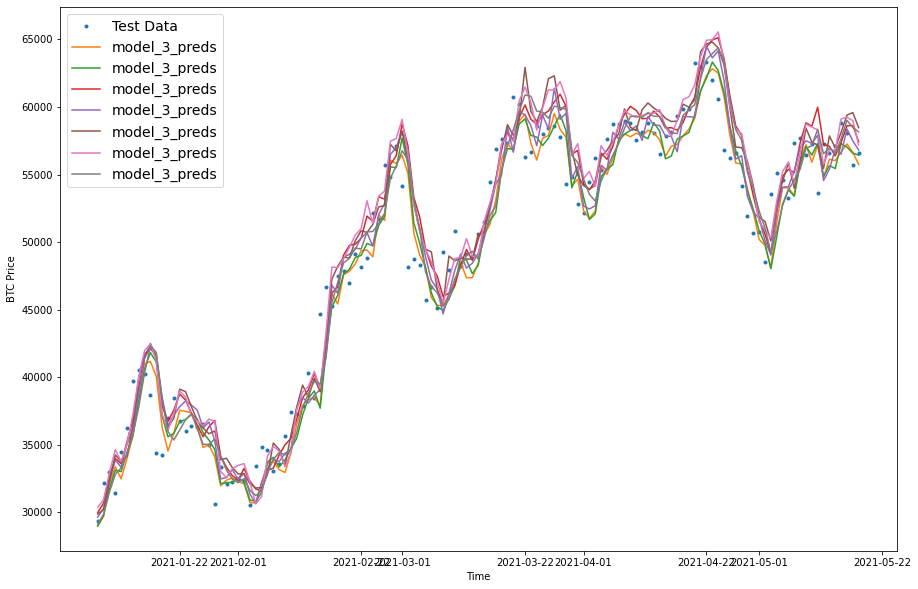

In [69]:
# Plot the model

offset=420
plt.figure(figsize=(15,10))

plot_time_series(timesteps=X_test[-len(test_windows):], values=test_labels[:, 0], start=offset, label="Test Data")
plot_time_series(timesteps=X_test[-len(test_windows):], values=model_3_preds, format="-", start=offset, label="model_3_preds")

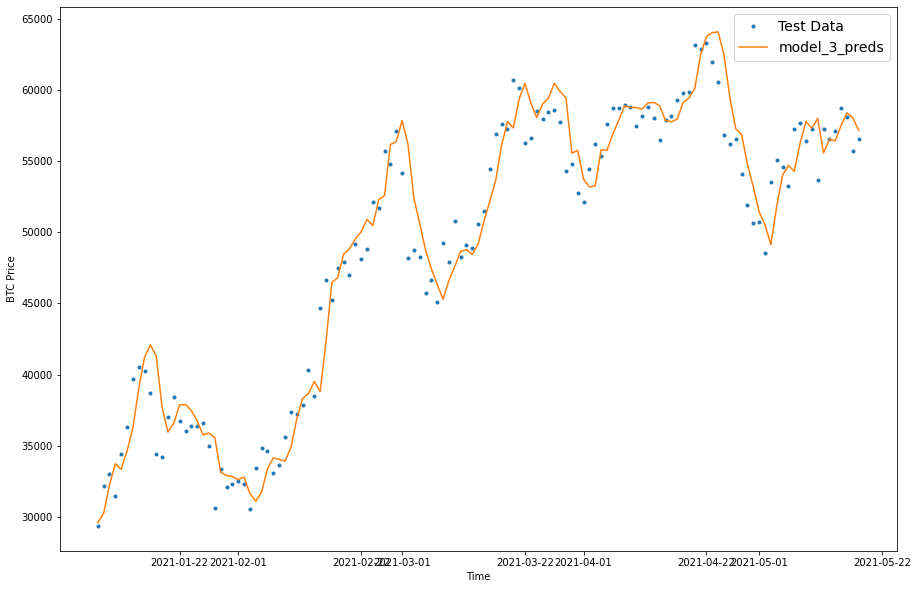

In [70]:
# Time to reduce_mean aka aggregate values

offset=420
plt.figure(figsize=(15,10))

plot_time_series(timesteps=X_test[-len(test_windows):], values=test_labels[:, 0], start=offset, label="Test Data")
plot_time_series(timesteps=X_test[-len(test_windows):], values=tf.reduce_mean(model_3_preds, axis=1), format="-", start=offset, label="model_3_preds")

### Which models performs best so far?

Let's compare them so far

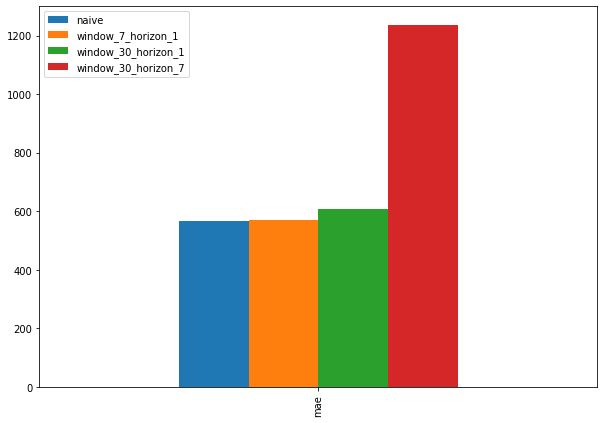

In [71]:
pd.DataFrame({"naive": naive_results["mae"],
              "window_7_horizon_1": model_1_results["mae"],
              "window_30_horizon_1": model_2_results["mae"],
              "window_30_horizon_7": model_3_results["mae"]}, index=["mae"]).plot(figsize=(10,7), kind="bar");

## Model 4: Conv1D Model



In [72]:
HORIZON = 1
WINDOW_SIZE = 7

In [73]:
# Create dataset

full_windows, full_labels = make_windows(prices, window_size=WINDOW_SIZE, horizon=HORIZON)
len(full_windows), len(full_labels)

(2780, 2780)

In [74]:
# Train and test sets

train_windows, test_windows, train_labels, test_labels = make_train_test_splits(full_windows, full_labels)

len(train_windows), len(test_windows), len(train_labels), len(test_labels)

(2224, 556, 2224, 556)

Need an input shape of: `(batch_size , timesteps, input_dim)`

In [75]:
# Data input shape

train_windows[0].shape # Returns window size


(7,)

In [76]:
# Before passing the data to conv1d, we have to reshape, to make it work
x = tf.constant(train_windows[0])
x

<tf.Tensor: shape=(7,), dtype=float64, numpy=
array([123.65499, 125.455  , 108.58483, 118.67466, 121.33866, 120.65533,
       121.795  ])>

In [77]:
expand_dims_layers = layers.Lambda(lambda x: tf.expand_dims(x, axis=1)) # Adds extra dimension for input_dim
expand_dims_layers

In [78]:
# Test out lambda layer

print(f"Original shape: {x.shape}") # window size
print(f"Expanded shape: {expand_dims_layers(x).shape}") # window size + extra dimension for input_dim
print(f"Original values with expanded shape:\n {expand_dims_layers(x)}")

Original shape: (7,)
Expanded shape: (7, 1)
Original values with expanded shape:
 [[123.65499]
 [125.455  ]
 [108.58483]
 [118.67466]
 [121.33866]
 [120.65533]
 [121.795  ]]


In [79]:
# Set seed
tf.random.set_seed(42)

# Create model
model_4 = tf.keras.Sequential([
  layers.Lambda(lambda x: tf.expand_dims(x, axis=1)),
  layers.Conv1D(128, kernel_size=5, strides=1, padding="causal", activation="relu"),
  layers.Dense(HORIZON)
], name="model_4_conv1d")

# Compile
model_4.compile(loss="mae",
                optimizer="adam")

# Fit the model
model_4.fit(train_windows,
            train_labels,
            epochs=100,
            batch_size=128,
            verbose=0,
            validation_data=(test_windows, test_labels),
            callbacks=[create_model_checkpoint(model_name=model_4.name)])

INFO:tensorflow:Assets written to: model_experiments/model_4_conv1d/assets
INFO:tensorflow:Assets written to: model_experiments/model_4_conv1d/assets
INFO:tensorflow:Assets written to: model_experiments/model_4_conv1d/assets
INFO:tensorflow:Assets written to: model_experiments/model_4_conv1d/assets
INFO:tensorflow:Assets written to: model_experiments/model_4_conv1d/assets
INFO:tensorflow:Assets written to: model_experiments/model_4_conv1d/assets
INFO:tensorflow:Assets written to: model_experiments/model_4_conv1d/assets
INFO:tensorflow:Assets written to: model_experiments/model_4_conv1d/assets
INFO:tensorflow:Assets written to: model_experiments/model_4_conv1d/assets
INFO:tensorflow:Assets written to: model_experiments/model_4_conv1d/assets
INFO:tensorflow:Assets written to: model_experiments/model_4_conv1d/assets
INFO:tensorflow:Assets written to: model_experiments/model_4_conv1d/assets
INFO:tensorflow:Assets written to: model_experiments/model_4_conv1d/assets
INFO:tensorflow:Assets wr

In [80]:
model_4.summary()

Model: "model_4_conv1d"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lambda_1 (Lambda)            (None, 1, 7)              0         
_________________________________________________________________
conv1d (Conv1D)              (None, 1, 128)            4608      
_________________________________________________________________
dense_6 (Dense)              (None, 1, 1)              129       
Total params: 4,737
Trainable params: 4,737
Non-trainable params: 0
_________________________________________________________________


In [81]:
# Eval model

model_4.evaluate(train_windows, train_labels)

70/70 [==============================] - 0s 2ms/step - loss: 111.2363


111.2363052368164

In [82]:
# Load best model

model_4 = tf.keras.models.load_model("model_experiments/model_4_conv1d/")
model_4.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 3ms/step - loss: 570.8285


570.8284912109375

In [83]:
# Make preds

model_4_preds = make_preds(model_4,
                           input_data=test_windows)
model_4_preds[:5]

<tf.Tensor: shape=(5,), dtype=float32, numpy=array([8851.464, 8754.47 , 8983.927, 8759.671, 8703.627], dtype=float32)>

In [84]:
# model_4 results

model_4_results = evaluate_preds(y_true=tf.squeeze(test_labels),
                                 y_pred=model_4_preds)
model_4_results

{'mae': 570.8284,
 'mape': 2.5593362,
 'mase': 1.0027875,
 'mse': 1176671.2,
 'rmse': 1084.7448}

In [85]:
naive_results

{'mae': 567.9802,
 'mape': 2.516525,
 'mase': 0.99957,
 'mse': 1147547.0,
 'rmse': 1071.2362}

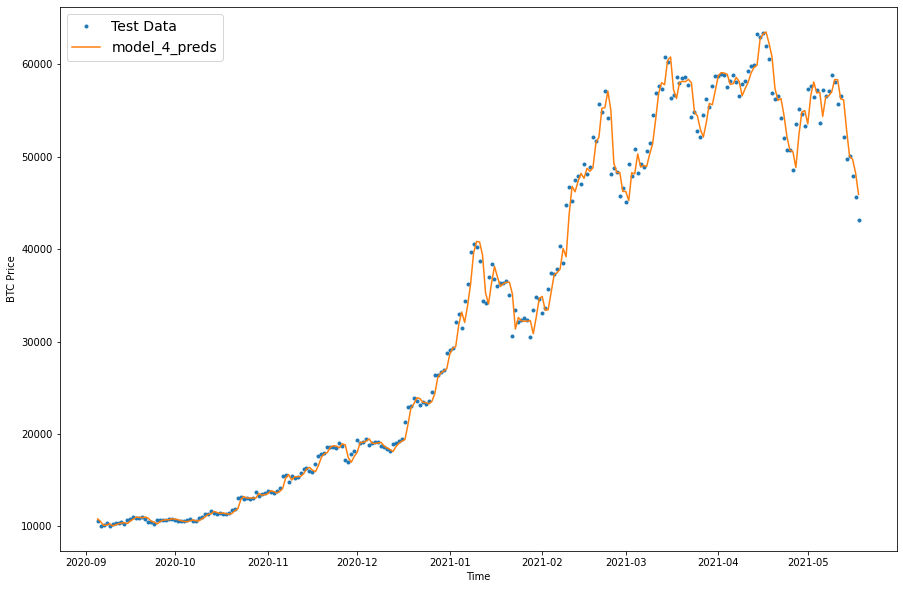

In [86]:
# Plot the model

offset=300
plt.figure(figsize=(15,10))

plot_time_series(timesteps=X_test[-len(test_windows):], values=test_labels[:, 0], start=offset, label="Test Data")
plot_time_series(timesteps=X_test[-len(test_windows):], values=model_4_preds, format="-", start=offset, label="model_4_preds")

## Model 5: RNN (LSTM) - Same data as Model 4

In [87]:
tf.random.set_seed(42)

# Create model (functional API)
inputs = layers.Input(shape=(WINDOW_SIZE))
x = layers.Lambda(lambda x: tf.expand_dims(x, axis=1))(inputs)
# x = layers.LSTM(128, return_sequences=True)(x) # Future Testing
x = layers.LSTM(128, activation="relu")(x)
# x = layers.Dense(32, activation="relu")(x) # Future testing

output = layers.Dense(HORIZON)(x)

model_5 = tf.keras.Model(inputs=inputs, outputs=output, name="model_5_LSTM")

# Compile model
model_5.compile(loss="mae",
                optimizer="adam")

# Fit model
model_5.fit(train_windows,
            train_labels,
            epochs=100,
            verbose=1,
            batch_size=128,
            validation_data=(test_windows, test_labels),
            callbacks=[create_model_checkpoint(model_name=model_5.name)])

Epoch 1/100
18/18 [==============================] - 1s 17ms/step - loss: 2323.6082 - val_loss: 9222.6523
INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets
Epoch 2/100
18/18 [==============================] - 0s 6ms/step - loss: 695.4739 - val_loss: 1486.0555
INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets
Epoch 3/100
18/18 [==============================] - 0s 6ms/step - loss: 237.3967 - val_loss: 1298.9084
INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets
Epoch 4/100
18/18 [==============================] - 0s 6ms/step - loss: 181.9180 - val_loss: 966.6431
INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets
Epoch 5/100
18/18 [==============================] - 0s 7ms/step - loss: 173.4022 - val_loss: 970.9295
Epoch 6/100
18/18 [==============================] - 0s 6ms/step - loss: 173.5414 - val_loss: 941.4746
INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets
Epoch 7/100


In [88]:
# Load best model_5

model_5 = tf.keras.models.load_model("model_experiments/model_5_LSTM/")
model_5.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 2ms/step - loss: 594.6030


594.6029663085938

In [89]:
# Make preds

model_5_preds = make_preds(model_5, test_windows)
model_5_preds[:3]

<tf.Tensor: shape=(3,), dtype=float32, numpy=array([8978.46 , 8810.951, 8997.779], dtype=float32)>

In [90]:
# Eval model 5

model_5_results = evaluate_preds(y_true=tf.squeeze(test_labels),
                                 y_pred=model_5_preds)
model_5_results

{'mae': 594.60297,
 'mape': 2.6717565,
 'mase': 1.0445527,
 'mse': 1267231.9,
 'rmse': 1125.714}

In [91]:
naive_results, model_4_results

({'mae': 567.9802,
  'mape': 2.516525,
  'mase': 0.99957,
  'mse': 1147547.0,
  'rmse': 1071.2362},
 {'mae': 570.8284,
  'mape': 2.5593362,
  'mase': 1.0027875,
  'mse': 1176671.2,
  'rmse': 1084.7448})

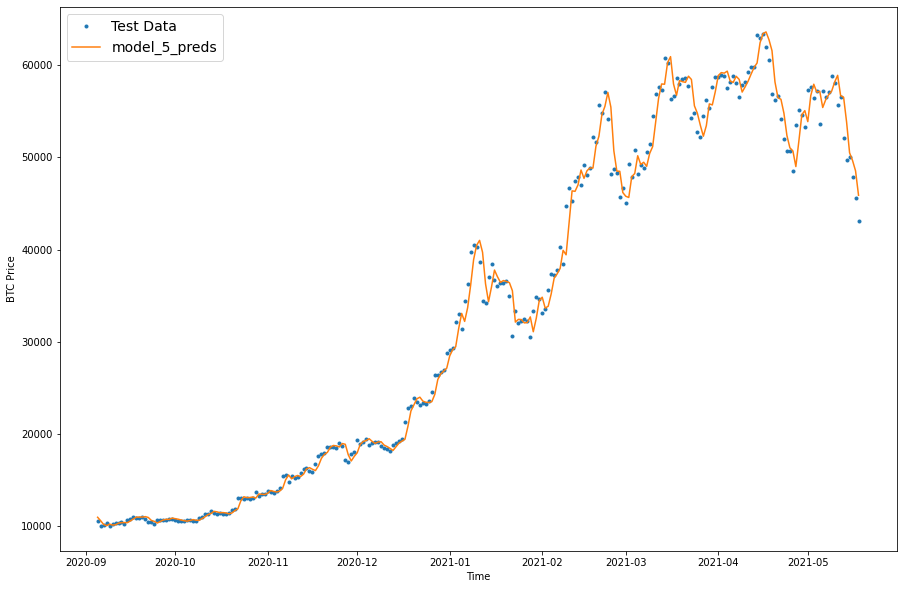

In [92]:
# Plot the model

offset=300
plt.figure(figsize=(15,10))
#
plot_time_series(timesteps=X_test[-len(test_windows):], values=test_labels[:, 0], start=offset, label="Test Data")
plot_time_series(timesteps=X_test[-len(test_windows):], values=model_5_preds, format="-", start=offset, label="model_5_preds")

### Modeling tip 🔑

Nueral Network are powerfl algorithms, and can be used for almost anything. Doesn't mean that they'll perform or have usable results in every application/dataset

## Making a multivariate dataset

What features can we use?

* Bitcoin halving events

In [93]:
# Multivariate time series

bitcoin_prices.head()

,Price
Date,
2013-10-01,123.65499
2013-10-02,125.45500
2013-10-03,108.58483
2013-10-04,118.67466
2013-10-05,121.33866


In [94]:
bitcoin_prices.tail()

,Price
Date,
2021-05-14,49764.132082
2021-05-15,50032.693137
2021-05-16,47885.625255
2021-05-17,45604.615754
2021-05-18,43144.471291


In [95]:
# Halving values
block_reward_1 = 50 # January 3, 2009 - block reward isnt in our dataset
block_reward_2 = 25 # November 28, 2012
block_reward_3 = 12.5 # July 9, 2016
block_reward_4 = 6.25 # May 18, 2020


# Block reward dates
block_reward_2_datetime = np.datetime64("2012-11-28") # Year, Month, Day
block_reward_3_datetime = np.datetime64("2016-07-09")
block_reward_4_datetime = np.datetime64("2020-05-18")


In [96]:
# Data ranges for specific block_reward values

block_reward_2_days = (block_reward_3_datetime - bitcoin_prices.index[0]).days
block_reward_3_days = (block_reward_4_datetime - bitcoin_prices.index[0]).days
block_reward_2_days, block_reward_3_days

(1012, 2421)

In [97]:
# Add in block reward column

bitcoin_prices_block = bitcoin_prices.copy()
bitcoin_prices_block["block_reward"] = None

# Add block_reward feature to dataframe
bitcoin_prices_block.iloc[:block_reward_2_days, -1] = block_reward_2
bitcoin_prices_block.iloc[block_reward_2_days:block_reward_3_days, -1] = block_reward_3
bitcoin_prices_block.iloc[block_reward_3_days:, -1] = block_reward_4



In [98]:
bitcoin_prices_block.head(), bitcoin_prices_block.tail()

(                Price block_reward
 Date                              
 2013-10-01  123.65499           25
 2013-10-02  125.45500           25
 2013-10-03  108.58483           25
 2013-10-04  118.67466           25
 2013-10-05  121.33866           25,                    Price block_reward
 Date                                 
 2021-05-14  49764.132082         6.25
 2021-05-15  50032.693137         6.25
 2021-05-16  47885.625255         6.25
 2021-05-17  45604.615754         6.25
 2021-05-18  43144.471291         6.25)

In [99]:
bitcoin_prices_block[:1500]

,Price,block_reward
Date,,
2013-10-01,123.65499,25
2013-10-02,125.45500,25
2013-10-03,108.58483,25
2013-10-04,118.67466,25
2013-10-05,121.33866,25
...,...,...
2017-11-04,7210.46875,12.5
2017-11-05,7376.74250,12.5
2017-11-06,7231.93000,12.5


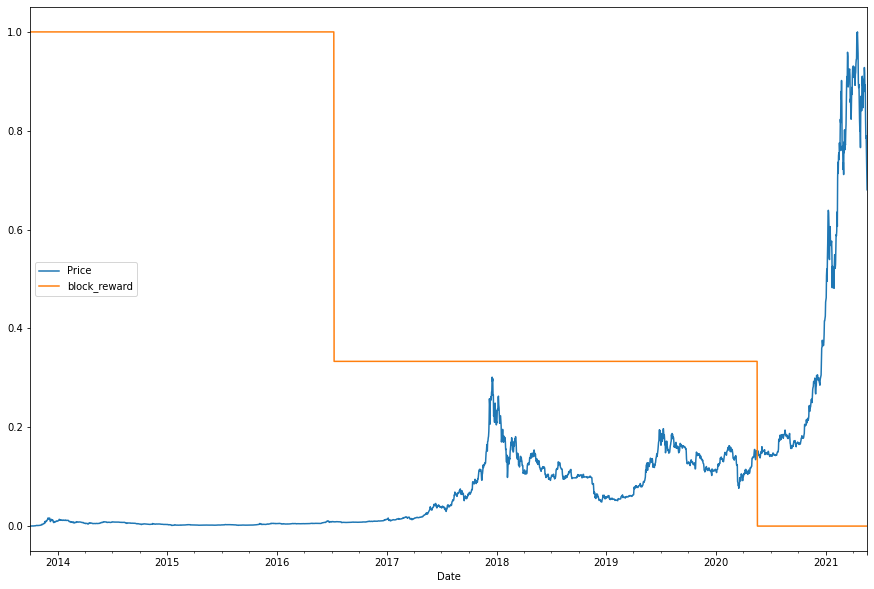

In [100]:
# Plot block_reward vs price

from sklearn.preprocessing import minmax_scale

scaled_price_block_df = pd.DataFrame(minmax_scale(bitcoin_prices_block[["Price", "block_reward"]]),
                                                                       columns=bitcoin_prices_block.columns,
                                                                       index=bitcoin_prices_block.index)

scaled_price_block_df.plot(figsize=(15,10));

## Making windowed dataset with pandas (Multivariate)



In [101]:
#Dataset hyperparameters
HORIZON = 1
WINDOW_SIZE = 7

In [102]:
# Make a copy of the historical data

bitcoin_prices_windowed = bitcoin_prices_block.copy()

# Add windowed columns

for i in range(WINDOW_SIZE):
  bitcoin_prices_windowed[f"Price={i+1}"] = bitcoin_prices_windowed["Price"].shift(periods=i+1)
bitcoin_prices_windowed.head(10)

,Price,block_reward,Price=1,Price=2,Price=3,Price=4,Price=5,Price=6,Price=7
Date,,,,,,,,,
2013-10-01,123.65499,25,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-10-02,125.45500,25,123.65499,NaN,NaN,NaN,NaN,NaN,NaN
2013-10-03,108.58483,25,125.45500,123.65499,NaN,NaN,NaN,NaN,NaN
2013-10-04,118.67466,25,108.58483,125.45500,123.65499,NaN,NaN,NaN,NaN
2013-10-05,121.33866,25,118.67466,108.58483,125.45500,123.65499,NaN,NaN,NaN
2013-10-06,120.65533,25,121.33866,118.67466,108.58483,125.45500,123.65499,NaN,NaN
2013-10-07,121.79500,25,120.65533,121.33866,118.67466,108.58483,125.45500,123.65499,NaN
2013-10-08,123.03300,25,121.79500,120.65533,121.33866,118.67466,108.58483,125.45500,123.65499
2013-10-09,124.04900,25,123.03300,121.79500,120.65533,121.33866,118.67466,108.58483,125.45500


In [103]:
 # Create X (windows) and y (horizon) features

 X = bitcoin_prices_windowed.dropna().drop("Price", axis=1).astype(np.float32)
 y = bitcoin_prices_windowed.dropna()["Price"].astype(np.float32)
 X.head()

,block_reward,Price=1,Price=2,Price=3,Price=4,Price=5,Price=6,Price=7
Date,,,,,,,,
2013-10-08,25.0,121.794998,120.655327,121.338661,118.674660,108.584831,125.455002,123.654991
2013-10-09,25.0,123.032997,121.794998,120.655327,121.338661,118.674660,108.584831,125.455002
2013-10-10,25.0,124.049004,123.032997,121.794998,120.655327,121.338661,118.674660,108.584831
2013-10-11,25.0,125.961159,124.049004,123.032997,121.794998,120.655327,121.338661,118.674660
2013-10-12,25.0,125.279663,125.961159,124.049004,123.032997,121.794998,120.655327,121.338661


In [104]:
 y.head()

Date
2013-10-08    123.032997
2013-10-09    124.049004
2013-10-10    125.961159
2013-10-11    125.279663
2013-10-12    125.927498
Name: Price, dtype: float32

In [105]:
# Train and test sets
split_size = int(len(X) * 0.8)
X_train, y_train = X[:split_size], y[:split_size]
X_test, y_test = X[split_size:], y[split_size:]

len(X_train), len(y_train), len(X_test), len(y_test)

(2224, 2224, 556, 556)

## Model 6: Multivariate model

Same architecture to Model_1. Except we are training on the multivariate data instead of the univariate.

In [106]:

# Random seed
tf.random.set_seed(42)

# Multivariate model
model_6 = tf.keras.Sequential([
    layers.Dense(128, activation="relu"),
    layers.Dense(HORIZON, activation="linear")
], name="model_6_multivariate")

# Compile
model_6.compile(loss="mae",
                optimizer="adam")

# Fit the model
model_6.fit(x=X_train,
            y=y_train,
            epochs=100,
            verbose=1,
            batch_size=128,
            validation_data=(X_test, y_test),
            callbacks=[create_model_checkpoint(model_name=model_6.name)])

Epoch 1/100
18/18 [==============================] - 0s 9ms/step - loss: 1234.6804 - val_loss: 2061.9077
INFO:tensorflow:Assets written to: model_experiments/model_6_multivariate/assets
Epoch 2/100
18/18 [==============================] - 0s 3ms/step - loss: 351.5053 - val_loss: 1908.6733
INFO:tensorflow:Assets written to: model_experiments/model_6_multivariate/assets
Epoch 3/100
18/18 [==============================] - 0s 4ms/step - loss: 235.4153 - val_loss: 1329.0585
INFO:tensorflow:Assets written to: model_experiments/model_6_multivariate/assets
Epoch 4/100
18/18 [==============================] - 0s 3ms/step - loss: 208.6112 - val_loss: 1102.1342
INFO:tensorflow:Assets written to: model_experiments/model_6_multivariate/assets
Epoch 5/100
18/18 [==============================] - 0s 4ms/step - loss: 196.5770 - val_loss: 1107.8474
Epoch 6/100
18/18 [==============================] - 0s 3ms/step - loss: 187.2245 - val_loss: 1036.1720
INFO:tensorflow:Assets written to: model_experiment

In [107]:
# Load best model

model_6 = tf.keras.models.load_model("model_experiments/model_6_multivariate/")
model_6.evaluate(X_test, y_test)

18/18 [==============================] - 0s 2ms/step - loss: 567.8899


567.889892578125

In [108]:
model_6_preds = make_preds(model_6,
                           input_data=X_test)
model_6_preds

<tf.Tensor: shape=(556,), dtype=float32, numpy=
array([ 8844.684 ,  8769.905 ,  9045.17  ,  8747.686 ,  8728.429 ,
        8772.757 ,  8667.292 ,  8503.437 ,  8470.313 ,  8527.244 ,
        8238.248 ,  8104.2837,  8075.3057,  7660.394 ,  7289.175 ,
        7276.9727,  7090.6523,  7165.9717,  7152.981 ,  7481.1064,
        7437.3022,  7710.821 ,  7611.62  ,  7412.4463,  7342.944 ,
        7322.142 ,  7209.663 ,  7370.9634,  7517.8076,  7546.2236,
        7569.1943,  7381.327 ,  7247.6797,  7198.906 ,  7180.86  ,
        7224.6763,  7107.423 ,  7106.336 ,  6914.44  ,  6597.423 ,
        7314.834 ,  7221.261 ,  7123.581 ,  7310.6924,  7284.903 ,
        7166.4326,  7240.0864,  7230.7446,  7188.315 ,  7229.841 ,
        7316.5317,  7391.6724,  7282.6973,  7194.9277,  7182.865 ,
        6977.7007,  7238.982 ,  7357.549 ,  7355.0845,  7699.7827,
        8064.6143,  8112.268 ,  7878.6255,  8088.5366,  8119.242 ,
        8144.0806,  8139.967 ,  8697.845 ,  8893.031 ,  8763.146 ,
        8945.0

In [109]:
model_6_results = evaluate_preds(y_true=tf.squeeze(y_test),
                                 y_pred=model_6_preds)
model_6_results

{'mae': 567.8899,
 'mape': 2.5460758,
 'mase': 0.99762523,
 'mse': 1164816.4,
 'rmse': 1079.2666}

In [110]:
naive_results, model_1_results

({'mae': 567.9802,
  'mape': 2.516525,
  'mase': 0.99957,
  'mse': 1147547.0,
  'rmse': 1071.2362},
 {'mae': 568.9511,
  'mape': 2.5448983,
  'mase': 0.99948955,
  'mse': 1171743.8,
  'rmse': 1082.4712})

## As we can see our multivariate model achieves a better `MAE` score on both the Naive forecast and model 1. Slightly better than both but still a win

### Building and testing N-BEATS block layer

In [111]:
# Create NBEATS custom layer

class NBeatsBlock(tf.keras.layers.Layer):
  def __init__(self,
               input_size: int,
               theta_size: int,
               horizon: int,
               n_nuerons: int,
               n_layers: int,
               **kwargs): # takes care of all arguments for parent class

    super().__init__(**kwargs)
    self.input_size = input_size
    self.theta_size = theta_size
    self.horizon = horizon
    self.n_nuerons = n_nuerons
    self.n_layers = n_layers

    # BLock contains 4 FC (Fully Connected) Layers. Each has RELU activation
    self.hidden = [tf.keras.layers.Dense(n_nuerons, activation="relu") for _ in range(n_layers)]
    
    # Output of block is theta layer with linear activation
    self.theta_layer = tf.keras.layers.Dense(theta_size, activation="linear", name="theta")

  def call(self, inputs):
    x = inputs
    for layer in self.hidden:
      x = layer(x)
    theta = self.theta_layer(x)
    # Output backcast and forecast for theta
    backcast, forecast = theta[:, :self.input_size], theta[:, -self.horizon]
    return backcast, forecast

Time to test NBeatsBlock Class, using dummy inputs

In [112]:
# Set up dummy layer
tf.random.set_seed(42)
dummy_nbeats_block_layer = NBeatsBlock(input_size=WINDOW_SIZE,
                                       theta_size=WINDOW_SIZE+HORIZON, #backcast + forecast
                                       horizon=HORIZON,
                                       n_nuerons=128,
                                       n_layers=4)

In [113]:
# Create dummy inputs 

dummy_inputs = tf.expand_dims(tf.range(WINDOW_SIZE) +1, axis=0) #Input shape refects dense layer inputs
dummy_inputs

<tf.Tensor: shape=(1, 7), dtype=int32, numpy=array([[1, 2, 3, 4, 5, 6, 7]], dtype=int32)>

In [114]:
# Pass dummy inputs to layer

backcast, forecast = dummy_nbeats_block_layer(dummy_inputs)

# Activation outputs for theta layer (random due to no training)
print(f"Backcast: {tf.squeeze(backcast.numpy())}")
print(f"Forecast: {tf.squeeze(forecast.numpy())}")

Backcast: [ 0.07960171  0.32512033 -0.8428683  -0.6938985  -0.31720552 -0.5698734
 -0.6396662 ]
Forecast: 1.0071648359298706


## Preparing data for the N-BEATS algo using `tf.data` pipeline

In [115]:
HORIZON = 1
WINDOW_SIZE = 7

In [116]:
# Create data inputs for N-BEATS

bitcoin_prices.head()

,Price
Date,
2013-10-01,123.65499
2013-10-02,125.45500
2013-10-03,108.58483
2013-10-04,118.67466
2013-10-05,121.33866


In [117]:
# Add windowed columns with pandas

bitcoin_prices_nbeats = bitcoin_prices.copy()

for i in range(WINDOW_SIZE):
  bitcoin_prices_nbeats[f"Price+{i+1}"] = bitcoin_prices_nbeats["Price"].shift(periods=i+1)
bitcoin_prices_nbeats.head()

,Price,Price+1,Price+2,Price+3,Price+4,Price+5,Price+6,Price+7
Date,,,,,,,,
2013-10-01,123.65499,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-10-02,125.45500,123.65499,NaN,NaN,NaN,NaN,NaN,NaN
2013-10-03,108.58483,125.45500,123.65499,NaN,NaN,NaN,NaN,NaN
2013-10-04,118.67466,108.58483,125.45500,123.65499,NaN,NaN,NaN,NaN
2013-10-05,121.33866,118.67466,108.58483,125.45500,123.65499,NaN,NaN,NaN


In [118]:
# Features and labels
X = bitcoin_prices_nbeats.dropna().drop("Price", axis=1)
y = bitcoin_prices_nbeats.dropna()["Price"]


# Make train and test sets
split_size = int(len(X) * 0.8)
X_train, y_train = X[:split_size], y[:split_size]
X_test, y_test = X[split_size:], y[split_size:]

len(X_train), len(y_train), len(X_test), len(y_test)


(2224, 2224, 556, 556)

In [119]:
# Making dataset with tf.data aka performant

# Train datasets
train_features_dataset = tf.data.Dataset.from_tensor_slices(X_train)
train_labels_dataset = tf.data.Dataset.from_tensor_slices(y_train)

# Test datasets
test_features_dataset = tf.data.Dataset.from_tensor_slices(X_test)
test_labels_dataset = tf.data.Dataset.from_tensor_slices(y_test)


# Combine features and labels
train_dataset = tf.data.Dataset.zip((train_features_dataset, train_labels_dataset))
test_dataset = tf.data.Dataset.zip((test_features_dataset, test_labels_dataset))

# Bath and prefetch
BATCH_SIZE = 1024

train_dataset = train_dataset.batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)
test_dataset = test_dataset.batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)

# Viualize datasets
train_dataset, test_dataset

(<PrefetchDataset shapes: ((None, 7), (None,)), types: (tf.float64, tf.float64)>,
 <PrefetchDataset shapes: ((None, 7), (None,)), types: (tf.float64, tf.float64)>)

## Setting up hyperparameters

https://arxiv.org/pdf/1905.10437.pdf (Table 18)

In [120]:
# Values from paper

N_EPOCHS = 5000
N_NUERONS = 512
N_LAYERS = 4
N_STACKS = 30

INPUT_SIZE = WINDOW_SIZE * HORIZON
THETA_SIZE = INPUT_SIZE + HORIZON

INPUT_SIZE, THETA_SIZE

(7, 8)

### Getting residual connections ready

In [128]:
# Make tensors 

tensor_1 = tf.range(10) + 10
tensor_2 = tf.range(10)

# Subtract

subtracted = layers.subtract([tensor_1, tensor_2])

# Add
added = layers.add([tensor_1, tensor_2])

# Get outputs
print(f"Input tensors: {tensor_1.numpy()} & {tensor_2.numpy()}")
print(f"Subtracted: {subtracted.numpy()}")
print(f"Added: {added.numpy()}")

Input tensors: [10 11 12 13 14 15 16 17 18 19] & [0 1 2 3 4 5 6 7 8 9]
Subtracted: [10 10 10 10 10 10 10 10 10 10]
Added: [10 12 14 16 18 20 22 24 26 28]


In [125]:
tensor_1, tensor_2

(<tf.Tensor: shape=(10,), dtype=int32, numpy=array([10, 11, 12, 13, 14, 15, 16, 17, 18, 19], dtype=int32)>,
 <tf.Tensor: shape=(10,), dtype=int32, numpy=array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=int32)>)

### Building, compiling and fitting our N-BEATS aglorithm

In [131]:
%%time

tf.random.set_seed(42)

# Step 1: NBeatsBlock
nbeats_block_layer = NBeatsBlock(input_size=INPUT_SIZE,
                                 theta_size=THETA_SIZE,
                                 horizon=HORIZON,
                                 n_nuerons=N_NUERONS,
                                 n_layers=N_LAYERS,
                                 name="InitialBlock")

# Step 2: Inputs to stacks
stack_input = layers.Input(shape=(INPUT_SIZE), name="stack_input")

# Step 3: Initial Backcast and Forecast
residuals, forecast = nbeats_block_layer(stack_input)

# Step 4: Stacks of block layers
for i, _ in enumerate(range(N_STACKS -1)): # FIrst stack already created in step 3

  # Step 5: NBeatsBlock to calculate backcast and forecast
  backcast, block_forecast = NBeatsBlock(
      input_size=INPUT_SIZE,
      theta_size=THETA_SIZE,
      horizon=HORIZON,
      n_nuerons=N_NUERONS,
      n_layers=N_LAYERS,
      name=f"NBeatsBlock_{i}"
  )(residuals) # Pass residuals

  # Step 6: Double residual stacking
  residuals = layers.subtract([residuals, backcast], name=f"subtract_{i}")
  forecast = layers.add([forecast, block_forecast], name=f"add_{i}")

# Step 7: Putting stack model together
model_7 = tf.keras.Model(inputs=stack_input,
                         outputs=forecast,
                         name="model_7_nbeats")

# Step 8: Compile Model
model_7.compile(loss="mae",
                optimizer="Adam")

# Step 9: Fit the model and callbacks
model_7.fit(train_dataset,
            epochs=N_EPOCHS,
            validation_data=test_dataset,
            verbose=0,
            callbacks=[tf.keras.callbacks.EarlyStopping(monitor="val_loss",
                       patience=200,
                       restore_best_weights=True),
                       tf.keras.callbacks.ReduceLROnPlateau(monitor="val_loss",
                                                            patience=100,
                                                            verbose=1)])


Epoch 00836: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.

Epoch 01248: ReduceLROnPlateau reducing learning rate to 1.0000000474974514e-05.

Epoch 01348: ReduceLROnPlateau reducing learning rate to 1.0000000656873453e-06.
CPU times: user 2min 56s, sys: 6.78 s, total: 3min 3s
Wall time: 3min 51s


In [133]:
# Eval N-Beats Model

model_7.evaluate(test_dataset)

1/1 [==============================] - 0s 29ms/step - loss: 572.1414


572.1414184570312

In [135]:
# Make prediction

model_7_preds = make_preds(model_7, test_dataset)
model_7_preds[:5]

<tf.Tensor: shape=(5,), dtype=float32, numpy=array([8836.598, 8782.795, 9030.235, 8750.62 , 8758.774], dtype=float32)>

In [137]:
# Evaluate preds

model_7_results = evaluate_preds(y_true=y_test,
                                 y_pred=model_7_preds)
model_7_results

{'mae': 572.1414,
 'mape': 2.569582,
 'mase': 1.005094,
 'mse': 1164399.2,
 'rmse': 1079.0734}

In [140]:
model_1_results

{'mae': 568.9511,
 'mape': 2.5448983,
 'mase': 0.99948955,
 'mse': 1171743.8,
 'rmse': 1082.4712}

In [141]:
naive_results

{'mae': 567.9802,
 'mape': 2.516525,
 'mase': 0.99957,
 'mse': 1147547.0,
 'rmse': 1071.2362}

 Even with a full N-BEATS model. Looks like in this application it didnt was as well as `model_1` or even the `naive_results`.

 Further proving the point of just because you can build the model doesn't mean you should build the model. All depends on the type of data

### Plotting N-BEATS Model

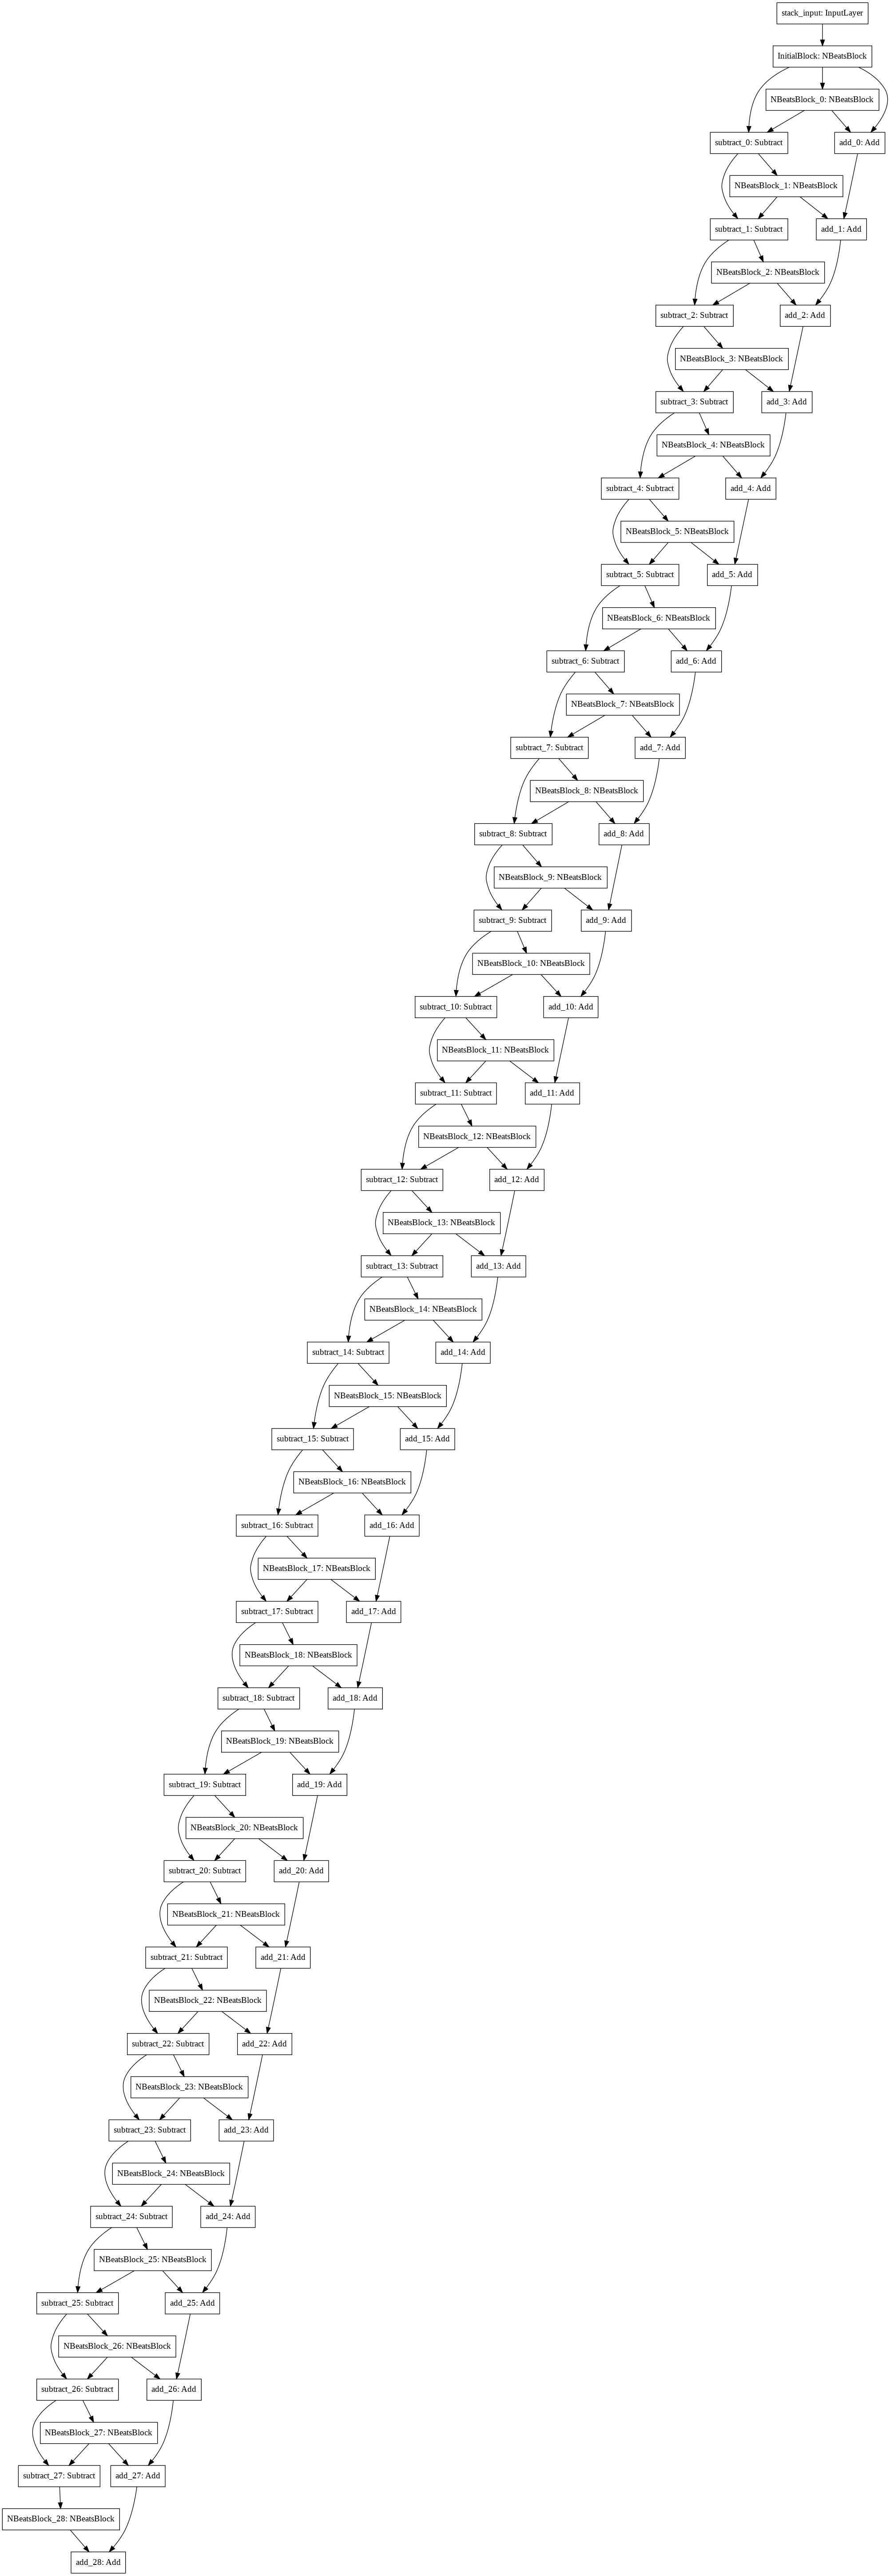

In [143]:
# Plot N-BEATS and compare to paper

from tensorflow.keras.utils import plot_model

plot_model(model_7)
